In [21]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression,
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier

In [3]:
model_dict = pickle.load(open('./cleandata.p', 'rb'))
data = model_dict['data']
target = model_dict['target']

In [4]:
data

,flavanoids,proline,color_intensity,hue,alcohol,od280/od315_of_diluted_wines
0,3.06,1065.0,5.64,1.04,14.23,3.92
1,2.76,1050.0,4.38,1.05,13.20,3.40
2,3.24,1185.0,5.68,1.03,13.16,3.17
3,3.49,1480.0,7.80,0.86,14.37,3.45
4,2.69,735.0,4.32,1.04,13.24,2.93
...,...,...,...,...,...,...
173,0.61,740.0,7.70,0.64,13.71,1.74
174,0.75,750.0,7.30,0.70,13.40,1.56
175,0.69,835.0,10.20,0.59,13.27,1.56
176,0.68,840.0,9.30,0.60,13.17,1.62


In [5]:
target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Traget, Length: 178, dtype: int32

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33, shuffle=True,stratify=target,
                                                    random_state=42)

In [10]:
x_train.shape

(119, 6)

In [11]:
x_test.shape

(59, 6)

# knn

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
k=KNeighborsClassifier(n_neighbors=5)
k.fit(x_train,y_train)
y_pred=k.predict(x_test)
accuracy0 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy0*100)
print()
print(classification_report(y_test,y_pred))

Accuracy: 69.49152542372882

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.67      0.87      0.75        23
           2       0.45      0.31      0.37        16

    accuracy                           0.69        59
   macro avg       0.67      0.66      0.66        59
weighted avg       0.68      0.69      0.68        59



# decision tree

In [17]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1*100)
print()
print(classification_report(y_test,y_pred))

Accuracy: 98.30508474576271

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        16

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# decision tree gs

In [24]:
params={'criterion':['gini', 'entropy', 'log_loss'],'max_depth':[2,5,8,10,None],'min_samples_split':[2,5,7,10],
       'max_features':[2,4,8,10,12,20,41,None]}

gs=GridSearchCV(dt,params,cv=4)
gs.fit(data, target)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 8, 10, None],
                         'max_features': [2, 4, 8, 10, 12, 20, 41, None],
                         'min_samples_split': [2, 5, 7, 10]})

In [25]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 4,
 'min_samples_split': 5}

In [46]:
dt_hype=DecisionTreeClassifier(criterion='gini',max_depth=10,max_features= 4,min_samples_split=5)
dt_hype.fit(x_train,y_train)
y_pred=dt_hype.predict(x_test)
accuracy11 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy11*100)
print(classification_report(y_test,y_pred))

Accuracy: 98.30508474576271
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00        16

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# svm

In [50]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy2*100)
print()
print(classification_report(y_test,y_pred))

Accuracy: 66.10169491525424

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.56      1.00      0.72        23
           2       0.00      0.00      0.00        16

    accuracy                           0.66        59
   macro avg       0.48      0.60      0.52        59
weighted avg       0.52      0.66      0.57        59



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# svm gs

In [58]:
params={'C':[1,10,100,0.1,0.01],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[1,0.1,0.01],'degree':[2,3,4,5]}
svg=GridSearchCV(svc,params,cv=4)
svg.fit(data, target)


GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 0.1, 0.01], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [59]:
svg.best_params_

{'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}

In [60]:
svc_hype=SVC(C= 0.01, gamma=0.01, kernel= 'poly',degree=2)
svc_hype.fit(x_train,y_train)
y_pred=svc_hype.predict(x_test)
accuracy12 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy12*100)
print(classification_report(y_test,y_pred))

Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        16

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



# random forest

In [62]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy3*100)
print()
print(classification_report(y_test,y_pred))

Accuracy: 96.61016949152543

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.96      0.96      0.96        23
           2       0.94      1.00      0.97        16

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



# rf gs

In [64]:
params={'n_estimators':[100,200,500,800,1000]}

rfg=GridSearchCV(rf,params,cv=4)
rfg.fit(data, target)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 500, 800, 1000]})

In [65]:
rfg.best_params_

{'n_estimators': 100}

In [72]:
rf_hype=RandomForestClassifier(n_estimators=100)
rf_hype.fit(x_train,y_train)
y_pred=rf_hype.predict(x_test)
accuracy13 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy13*100)
print(classification_report(y_test,y_pred))

Accuracy: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        16

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



# naive bayes

In [75]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred)
accuracy4=0.78434
print("Accuracy:", accuracy4*100)

print(classification_report(y_test,y_pred))

Accuracy: 78.434
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.96      0.96      0.96        23
           2       1.00      1.00      1.00        16

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



# bagging

In [87]:
bag=BaggingClassifier(estimator=svc,n_estimators=10,bootstrap=True)
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)
accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy5*100)
print(classification_report(y_test,y_pred))

Accuracy: 71.1864406779661
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.69      0.78      0.73        23
           2       0.47      0.50      0.48        16

    accuracy                           0.71        59
   macro avg       0.72      0.69      0.70        59
weighted avg       0.74      0.71      0.72        59



# adaboost

In [85]:
dt = DecisionTreeClassifier(max_depth=1)

ada=AdaBoostClassifier(estimator=dt,n_estimators=50,learning_rate=0.5)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
accuracy6 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy6*100)
print(classification_report(y_test,y_pred))

Accuracy: 94.91525423728814
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.88      1.00      0.94        23
           2       1.00      0.94      0.97        16

    accuracy                           0.95        59
   macro avg       0.96      0.95      0.95        59
weighted avg       0.96      0.95      0.95        59



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# logistic regression

In [92]:
lr=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=200)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy7=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy7*100)
print(classification_report(y_test,y_pred))

Accuracy: 91.52542372881356
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.85      0.96      0.90        23
           2       1.00      0.88      0.93        16

    accuracy                           0.92        59
   macro avg       0.93      0.91      0.92        59
weighted avg       0.92      0.92      0.92        59



C:\Users\visha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# GRAPHS

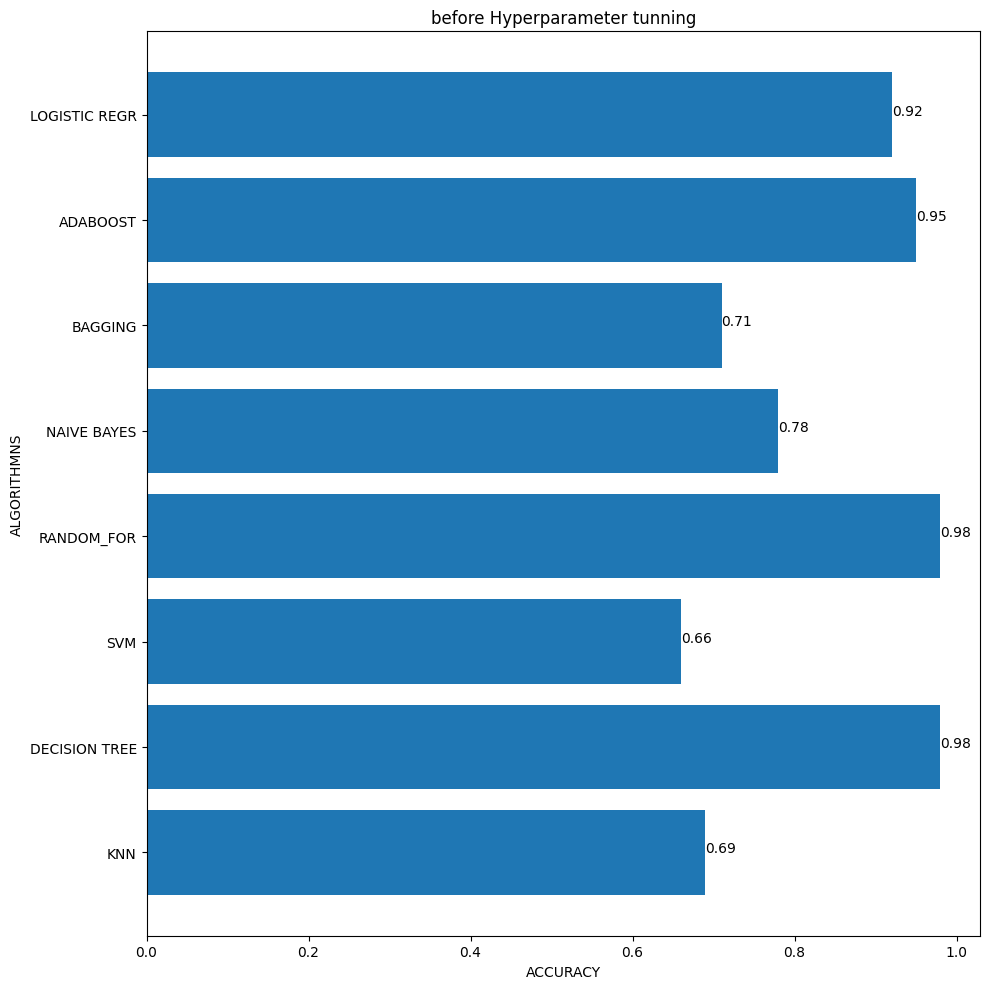

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=np.array([accuracy0,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7])
acc=np.round(acc,2)
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(acc)), acc)

plt.title("before Hyperparameter tunning")
plt.yticks(np.arange(len(acc)), ["KNN",'DECISION TREE','SVM','RANDOM_FOR','NAIVE BAYES','BAGGING','ADABOOST','LOGISTIC REGR'])

for index, value in enumerate(acc):
    plt.text(value, index,str(value))
plt.ylabel('ALGORITHMNS')
plt.xlabel('ACCURACY')
plt.tight_layout()
plt.show()

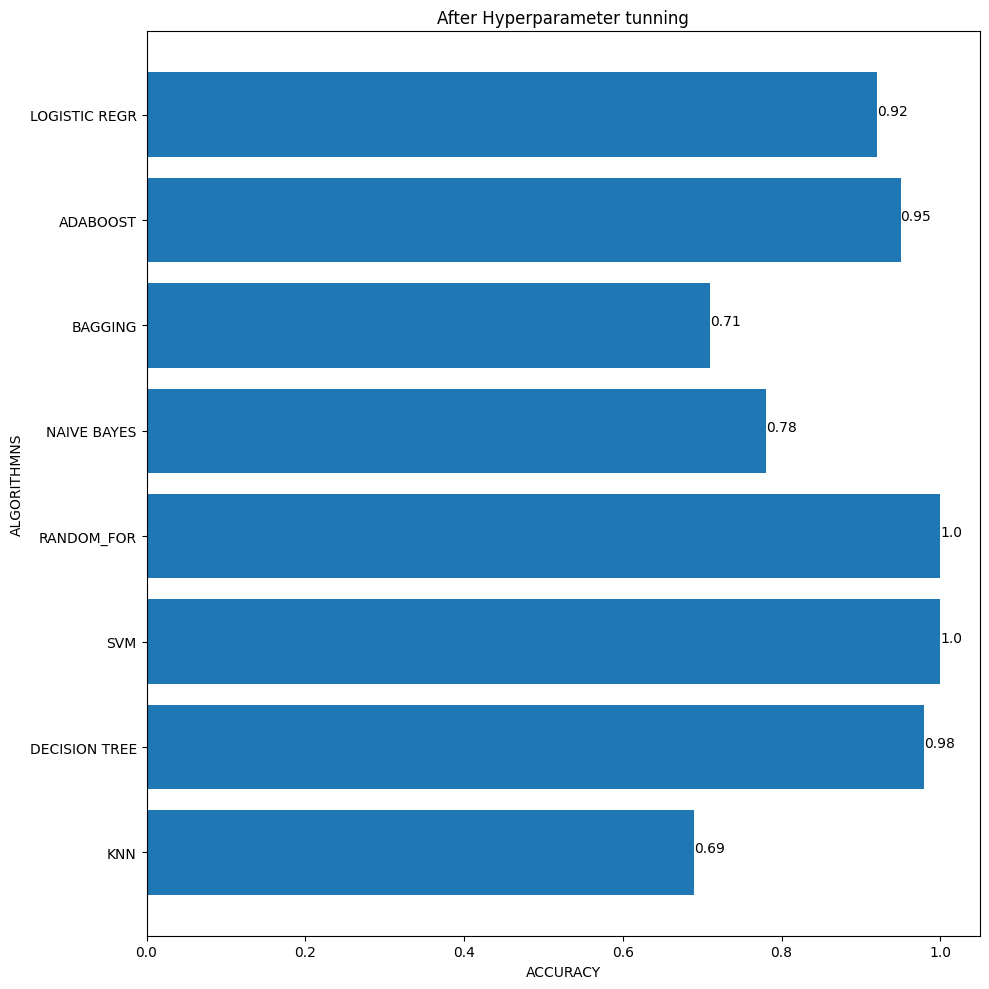

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
acc=np.array([accuracy0,accuracy11,accuracy12,accuracy13,accuracy4,accuracy5,accuracy6,accuracy7])
acc=np.round(acc,2)
plt.figure(figsize=(10, 10))
plt.barh(np.arange(len(acc)), acc)

plt.title("After Hyperparameter tunning")
plt.yticks(np.arange(len(acc)), ["KNN",'DECISION TREE','SVM','RANDOM_FOR','NAIVE BAYES','BAGGING','ADABOOST','LOGISTIC REGR'])

for index, value in enumerate(acc):
    plt.text(value, index,str(value))
plt.ylabel('ALGORITHMNS')
plt.xlabel('ACCURACY')
plt.tight_layout()
plt.show()